# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [38]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


* ### Read data from ‘.csv’ file

In [39]:
# read data from '.csv' file
dataset = pd.read_csv('winequality.csv') 

## Part 2: Exploratory Data Analysis.

* ### Info

In [40]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* ### Head

In [41]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [42]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Encoding 'quality' attribute

In [43]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
dataset['quality'] = dataset.quality.apply(lambda x: 0 if x >= 3 and x >=6 else 1)

In [44]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [45]:
print('Not good wine', round(dataset.quality.value_counts()[0]/len(dataset)*100, 2), '% of the dataset')
print('Good wine', round(dataset.quality.value_counts()[1]/len(dataset)*100, 2), '% of the dataset')

dataset.quality.value_counts()

Not good wine 66.52 % of the dataset
Good wine 33.48 % of the dataset


0    3258
1    1640
Name: quality, dtype: int64

<AxesSubplot:>

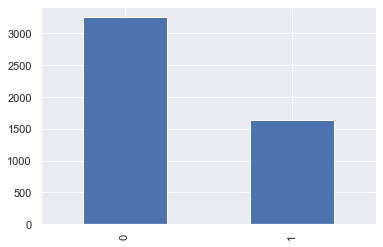

In [46]:
# visualisation plot
print('Not good wine', round(dataset['quality'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Good wine', round(dataset['quality'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

dataset['quality'].value_counts()

There are 66.52 % of 'Not Good' quality wines and only 33.48 % of 'Good' quality wines in our dataset. This means that our dataset is imbalanced.

* ### Resampling of an imbalanced dataset

In [47]:
# class count
count_class_0, count_class_1 = dataset.quality.value_counts()

# divide by class
class_0 = dataset[dataset['quality'] == 0]
class_1 = dataset[dataset['quality'] == 1]

print('class_0', len(class_0))
print('class_1', len(class_1))

class_0 3258
class_1 1640


* ### Random under-sampling of an imbalanced dataset

Random under-sampling:
0    1640
1    1640
Name: quality, dtype: int64


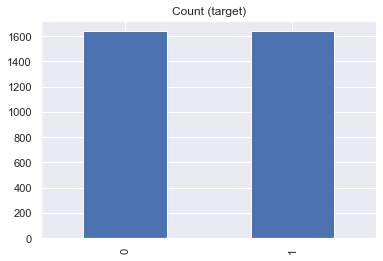

In [48]:
class_0_under = class_0.sample(count_class_1)
dataset_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(dataset_under.quality.value_counts())

dataset_under.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Random over-sampling of an imbalanced dataset

Random over-sampling:
0    3258
1    3258
Name: quality, dtype: int64


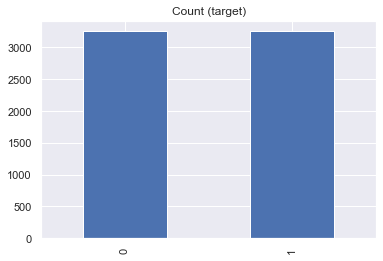

In [49]:
class_1_over = class_1.sample(count_class_0, replace=True)
dataset_over = pd.concat([class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(dataset_over.quality.value_counts())

dataset_over.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Initialisation of target

In [50]:
# initialisation of target
target = dataset['quality']

# for under-sampling dataset
target_under = dataset_under['quality']

# for over-sampling dataset
target_over = dataset_over['quality'] 

* ### Drop column 'quality'

In [51]:
dataset = dataset.drop(columns=['quality'])

# for under-sampling dataset
dataset_under = dataset_under.drop(columns=['quality'])

# for over-sampling dataset
dataset_over = dataset_over.drop(columns=['quality'])

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [52]:
# StandardScaler 
sc = StandardScaler()

dataset_sc = sc.fit_transform(dataset)
dataset_sc = pd.DataFrame(dataset_sc)

# for under-sampling dataset
dataset_sc_under = sc.fit_transform(dataset_under)
dataset_sc_under = pd.DataFrame(dataset_sc_under)

# for over-sampling dataset
dataset_sc_over = sc.fit_transform(dataset_over)
dataset_sc_over = pd.DataFrame(dataset_sc_over)

dataset_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


* ### Creating datasets for ML part

In [53]:
# set 'X' for features' and y' for the target ('quality').
y = target
X = dataset_sc.copy()

# for under-sampling dataset 
y_under = target_under
X_under = dataset_sc_under.copy()

# for over-sampling dataset 
y_over = target_over
X_over = dataset_sc_over.copy() 


In [54]:
# preview of the first 5 lines of the loaded data 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


* ### 'Train\Test' split

In [55]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((3918, 11), (3918,))

In [60]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((980, 11), (980,))

In [58]:
# apply 'Train\Test' splitting method for under-sampling dataset 
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0)

In [61]:
# print shape of X_train and y_train for under-sampling dataset 
X_train_under.shape, y_train_under.shape

((2624, 11), (2624,))

In [62]:
# print shape of X_test and y_test for under-sampling dataset
X_test_under.shape, y_test_under.shape

((656, 11), (656,))

In [63]:
# apply 'Train\Test' splitting method for over-sampling dataset
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

In [64]:
# print shape of X_train and y_train for over-sampling dataset 
X_train_over.shape, y_train_over.shape

((5212, 11), (5212,))

In [65]:
# print shape of X_test and y_test for over-sampling dataset
X_test_over.shape, y_test_over.shape

((1304, 11), (1304,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [68]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

In [69]:
#for under-sampling dataset

# Logistic Regression
LR_under = LogisticRegression()
LR_under.fit(X_train_under, y_train_under)
LR_pred_under = LR.predict(X_test_under)

# K-Nearest Neighbors
KNN_under = KNeighborsClassifier()
KNN_under.fit(X_train_under, y_train_under)
KNN_pred_under = KNN.predict(X_test_under)

# Decision Tree
DT_under = DecisionTreeClassifier(random_state = 0)
DT_under.fit(X_train_under, y_train_under)
DT_pred_under = DT.predict(X_test_under)

In [70]:
#for over-sampling dataset

# Logistic Regression
LR_over = LogisticRegression()
LR_over.fit(X_train_over, y_train_over)
LR_pred_over = LR.predict(X_test_over)

# K-Nearest Neighbors
KNN_over = KNeighborsClassifier()
KNN_over.fit(X_train_over, y_train_over)
KNN_pred_over = KNN.predict(X_test_over)

# Decision Tree
DT_over = DecisionTreeClassifier(random_state = 0)
DT_over.fit(X_train_over, y_train_over)
DT_pred_over = DT.predict(X_test_over)

* ### Classification report

In [71]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.781421  0.878648  0.827187       651
           1   0.681452  0.513678  0.585789       329

    accuracy                       0.756122       980
   macro avg   0.731436  0.696163  0.706488       980
weighted avg   0.747860  0.756122  0.746146       980

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.801749  0.844854  0.822737       651
           1   0.656463  0.586626  0.619583       329

    accuracy                       0.758163       980
   macro avg   0.729106  0.715740  0.721160       980
weighted avg   0.752974  0.758163  0.754536       980

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.832551  0.817204  0.824806       651
           1   0.651026  0.674772  0.662687       329

    accuracy                       0.769388       980
   macro avg   0.741789  0.745988  0.743746

In [73]:
#for under-sampling dataset
print('Classification report for under-sampling dataset')
print()
print("LR Classification Report: \n", classification_report(y_test_under, LR_pred_under, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test_under, KNN_pred_under, digits = 6))
print("DT Classification Report: \n", classification_report(y_test_under, DT_pred_under, digits = 6))

Classification report for under-sampling dataset

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.610136  0.939940  0.739953       333
           1   0.860140  0.380805  0.527897       323

    accuracy                       0.664634       656
   macro avg   0.735138  0.660372  0.633925       656
weighted avg   0.733233  0.664634  0.635541       656

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.737589  0.936937  0.825397       333
           1   0.909871  0.656347  0.762590       323

    accuracy                       0.798780       656
   macro avg   0.823730  0.796642  0.793993       656
weighted avg   0.822417  0.798780  0.794472       656

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.777778  0.903904  0.836111       333
           1   0.881041  0.733746  0.800676       323

    accuracy                       0.820122    

In [74]:
#for over-sampling dataset
print('Classification report for over-sampling dataset')
print()
print("LR Classification Report: \n", classification_report(y_test_over, LR_pred_over, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test_over, KNN_pred_over, digits = 6))
print("DT Classification Report: \n", classification_report(y_test_over, DT_pred_over, digits = 6))

Classification report for over-sampling dataset

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.621735  0.907012  0.737756       656
           1   0.824207  0.441358  0.574874       648

    accuracy                       0.675613      1304
   macro avg   0.722971  0.674185  0.656315      1304
weighted avg   0.722350  0.675613  0.656815      1304

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.731946  0.911585  0.811948       656
           1   0.880903  0.662037  0.755947       648

    accuracy                       0.787577      1304
   macro avg   0.806425  0.786811  0.783948      1304
weighted avg   0.805968  0.787577  0.784120      1304

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.752270  0.884146  0.812894       656
           1   0.857411  0.705247  0.773920       648

    accuracy                       0.795245     

* ### Confusion matrix

In [83]:
#for imbalanced dataset

LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

LR Confusion Matrix: 
 [[572  79]
 [160 169]]

KNN Confusion Matrix: 
 [[550 101]
 [136 193]]

DT Confusion Matrix: 
 [[532 119]
 [107 222]]



In [80]:
#for under-sampling dataset

LR_confusion_mx_under = confusion_matrix(y_test_under, LR_pred_under)
print("LR Confusion Matrix: \n", LR_confusion_mx_under)
print()
KNN_confusion_mx_under = confusion_matrix(y_test_under, KNN_pred_under)
print("KNN Confusion Matrix: \n", KNN_confusion_mx_under)
print()
DT_confusion_mx_under = confusion_matrix(y_test_under, DT_pred_under)
print("DT Confusion Matrix: \n", DT_confusion_mx_under)
print()

LR Confusion Matrix: 
 [[313  20]
 [200 123]]

KNN Confusion Matrix: 
 [[312  21]
 [111 212]]

DT Confusion Matrix: 
 [[301  32]
 [ 86 237]]



In [81]:
#for over-sampling dataset

LR_confusion_mx_over = confusion_matrix(y_test_over, LR_pred_over)
print("LR Confusion Matrix: \n", LR_confusion_mx_over)
print()
KNN_confusion_mx_over = confusion_matrix(y_test_over, KNN_pred_over)
print("KNN Confusion Matrix: \n", KNN_confusion_mx_over)
print()
DT_confusion_mx_over = confusion_matrix(y_test_over, DT_pred_over)
print("DT Confusion Matrix: \n", DT_confusion_mx_over)
print()

LR Confusion Matrix: 
 [[595  61]
 [362 286]]

KNN Confusion Matrix: 
 [[598  58]
 [219 429]]

DT Confusion Matrix: 
 [[580  76]
 [191 457]]



* ### ROC-AUC score

In [82]:
#for imbalanced dataset

print('roc_auc_score for imbalanced dataset')
roc_auc_score(DT_pred, y_test)

roc_auc_score with imbalanced dataset


0.7417886268408758

In [84]:
#for under-sampling dataset

print('roc_auc_score for under-sampling dataset')
roc_auc_score(DT_pred_under, y_test_under)

roc_auc_score for under-sampling dataset


0.8294093349855433

In [85]:
#for over-sampling dataset

print('roc_auc_score for over-sampling dataset')
roc_auc_score(DT_pred_over, y_test_over)

roc_auc_score for over-sampling dataset


0.8048403306541296

* ### Build, train and evaluate models with hyperparameters

In [88]:
#for imbalanced dataset

# Logistic Regression
LR = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)


In [89]:
# print the best hyper parameters set (for imbalanced dataset)
print("Logistic Regression Best Hyper Parameters:   ", LR1.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)

Logistic Regression Best Hyper Parameters:    {'C': 2, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}
K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 9}
Decision Tree Best Hyper Parameters:          {'criterion': 'gini', 'max_depth': 15, 'random_state': 0}


In [90]:
#for under-sampling dataset

# Logistic Regression
LR_under = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1_under = GridSearchCV(LR_under, param_grid = LR_params)
LR1_under.fit(X_train_under, y_train_under)
LR1_pred_under = LR1_under.predict(X_test_under)

# K-Nearest Neighbors
KNN_under = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1_under = GridSearchCV(KNN_under, param_grid = KNN_params)             
KNN1_under.fit(X_train_under, y_train_under)
KNN1_pred_under = KNN1_under.predict(X_test_under)

# Decision Tree
DT_under = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1_under = GridSearchCV(DT_under, param_grid = DT_params)
DT1_under.fit(X_train_under, y_train_under)
DT1_pred_under = DT1_under.predict(X_test_under)

In [95]:
# print the best hyper parameters set (for under-sampling dataset)
print("Logistic Regression Best Hyper Parameters (under-sampling d_set):   ", LR1_under.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters (under-sampling d_set):   ", KNN1_under.best_params_)
print("Decision Tree Best Hyper Parameters (under-sampling d_set):         ", DT1_under.best_params_)

Logistic Regression Best Hyper Parameters (under-sampling d_set):    {'C': 1, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}
K-Nearest Neighbour Best Hyper Parameters (under-sampling d_set):    {'n_neighbors': 11}
Decision Tree Best Hyper Parameters (under-sampling d_set):          {'criterion': 'gini', 'max_depth': 15, 'random_state': 0}


In [105]:
#for over-sampling dataset

# Logistic Regression
LR_over = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1_over = GridSearchCV(LR_over, param_grid = LR_params)
LR1_over.fit(X_train_over, y_train_over)
LR1_pred_over = LR1_over.predict(X_test_over)

# K-Nearest Neighbors
KNN_over = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1_over = GridSearchCV(KNN_over, param_grid = KNN_params)             
KNN1_over.fit(X_train_over, y_train_over)
KNN1_pred_over = KNN1_over.predict(X_test_over)

# Decision Tree
DT_over = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1_over = GridSearchCV(DT_over, param_grid = DT_params)
DT1_over.fit(X_train_over, y_train_over)
DT1_pred_over = DT1_over.predict(X_test_over)

In [106]:
# print the best hyper parameters set (for over-sampling dataset)
print("Logistic Regression Best Hyper Parameters (over-sampling d_set):   ", LR1_over.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters (over-sampling d_set):   ", KNN1_over.best_params_)
print("Decision Tree Best Hyper Parameters (over-sampling d_set):         ", DT1_over.best_params_)

Logistic Regression Best Hyper Parameters (over-sampling d_set):    {'C': 2, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}
K-Nearest Neighbour Best Hyper Parameters (over-sampling d_set):    {'n_neighbors': 5}
Decision Tree Best Hyper Parameters (over-sampling d_set):          {'criterion': 'entropy', 'max_depth': 20, 'random_state': 0}


* ### Classification report

In [107]:
#for imbalanced dataset

print("LR Classification Report: \n", classification_report(y_test, LR1_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN1_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT1_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.782192  0.877112  0.826937       651
           1   0.680000  0.516717  0.587219       329

    accuracy                       0.756122       980
   macro avg   0.731096  0.696915  0.707078       980
weighted avg   0.747885  0.756122  0.746460       980

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.797432  0.858679  0.826923       651
           1   0.670251  0.568389  0.615132       329

    accuracy                       0.761224       980
   macro avg   0.733842  0.713534  0.721027       980
weighted avg   0.754736  0.761224  0.755822       980

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.825816  0.815668  0.820711       651
           1   0.643917  0.659574  0.651652       329

    accuracy                       0.763265       980
   macro avg   0.734867  0.737621  0.736181

In [108]:
#for under-sampling dataset

print("LR Classification Report: \n", classification_report(y_test_under, LR1_pred_under, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test_under, KNN1_pred_under, digits = 6))
print("DT Classification Report: \n", classification_report(y_test_under, DT1_pred_under, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.755486  0.723724  0.739264       333
           1   0.727003  0.758514  0.742424       323

    accuracy                       0.740854       656
   macro avg   0.741244  0.741119  0.740844       656
weighted avg   0.741462  0.740854  0.740820       656

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.756250  0.726727  0.741194       333
           1   0.729167  0.758514  0.743551       323

    accuracy                       0.742378       656
   macro avg   0.742708  0.742620  0.742373       656
weighted avg   0.742915  0.742378  0.742355       656

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.741840  0.750751  0.746269       333
           1   0.739812  0.730650  0.735202       323

    accuracy                       0.740854       656
   macro avg   0.740826  0.740700  0.740736

In [109]:
#for over-sampling dataset

print("LR Classification Report: \n", classification_report(y_test_over, LR1_pred_over, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test_over, KNN1_pred_over, digits = 6))
print("DT Classification Report: \n", classification_report(y_test_over, DT1_pred_over, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.730000  0.667683  0.697452       656
           1   0.690341  0.750000  0.718935       648

    accuracy                       0.708589      1304
   macro avg   0.710170  0.708841  0.708194      1304
weighted avg   0.710292  0.708589  0.708128      1304

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.825719  0.743902  0.782678       656
           1   0.764376  0.841049  0.800882       648

    accuracy                       0.792178      1304
   macro avg   0.795047  0.792476  0.791780      1304
weighted avg   0.795236  0.792178  0.791724      1304

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.938250  0.833841  0.882970       656
           1   0.848821  0.944444  0.894083       648

    accuracy                       0.888804      1304
   macro avg   0.893536  0.889143  0.888527

* ### Confusion matrix

DT Confusion Matrix


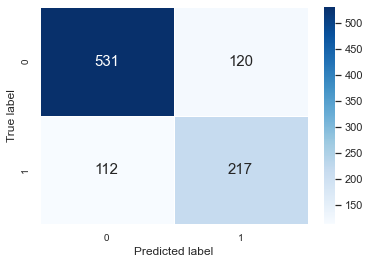

In [121]:
# confusion matrix of DT model (for imbalanced dataset)
DT_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticklabels(['0', '1'], fontsize = 10)
ax.yaxis.set_ticklabels(['0', '1'], fontsize = 10)
plt.show()
print() 

DT Confusion Matrix for under-sampling dataset


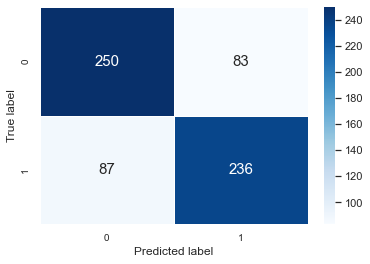

In [129]:
# confusion matrix of DT model (for under-sampling dataset)
DT_confusion_mx_under = confusion_matrix(y_test_under, DT1_pred_under)
print('DT Confusion Matrix for under-sampling dataset')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx_under, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticklabels(['0', '1'], fontsize = 10)
ax.yaxis.set_ticklabels(['0', '1'], fontsize = 10)
plt.show()
print() 

DT Confusion Matrix for over-sampling dataset


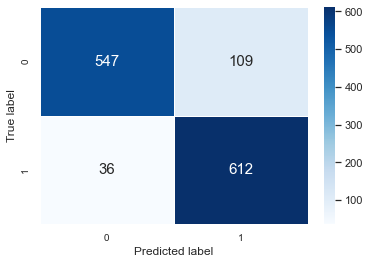

In [128]:
# confusion matrix of DT model (for over-sampling dataset)
DT_confusion_mx_over = confusion_matrix(y_test_over, DT1_pred_over)
print('DT Confusion Matrix for over-sampling dataset')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx_over, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticklabels(['0', '1'], fontsize = 10)
ax.yaxis.set_ticklabels(['0', '1'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [125]:
roc_auc_score(DT1_pred, y_test)

0.7348666995860466

In [126]:
roc_auc_score(DT1_pred_under, y_test_under)

0.7408258374184906

In [130]:
roc_auc_score(DT1_pred_over, y_test_over)

0.8935357553236286

##  Conclusion.

In [132]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test_over.index
sub['quality'] = DT1_pred_over
sub.to_csv('WinePredictionsTest.csv', index=False)

Question: Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model).

Answers:

Binary classification was applied.

Classes were highly imbalanced. There are 66.52 % of 'Not Good' quality wines and only 33.48 % of 'Good' quality wines in our dataset.

Three options were applied in order to calculate the best predictions:

Calculate predictions with imbalanced dataset
Calculate predictions with random under-sampling technique of an imbalanced dataset
Calculate predictions with random over-sampling technique of an imbalanced dataset
Three ML models were used: Logistic Regression, KNN, Decision Tree (without and with hyper parameters).

The best result was choosen:

Random over-sampling dataset with 3258 enteties in class '0' and 3258 enteties in class '1', 6516 enteties in total.
Train/Test split: test_size=0.2, random_state=0
Decision Tree model with hyper parameters tuning ('criterion': 'entropy', 'max_depth': 20, 'random_state': 0), with an accuracy score equal 0.888804 and ROC-AUC score equal  0.888804.